<a href="https://colab.research.google.com/github/bouhsiss/CPP_POOL/blob/master/Copy_of_STEG_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client_df = pd.read_csv('./client_train.csv')
invoice_df = pd.read_csv('./invoice_train.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
client_df.head()


,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [4]:
client_df.dtypes

disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [5]:
client_df['creation_date'] = pd.to_datetime(client_df['creation_date'])

In [6]:
client_df.dtypes

disrict                   int64
client_id                object
client_catg               int64
region                    int64
creation_date    datetime64[ns]
target                  float64
dtype: object

In [7]:
client_df['client_catg'].value_counts()

11    131494
12      2321
51      1678
Name: client_catg, dtype: int64

- observation : there are three categories


In [8]:
client_df.query('target == 1')['client_catg'].value_counts()

11    7191
51     283
12      92
Name: client_catg, dtype: int64

- even there are more clients from categorie 12 , there are more frauds in catg 51

In [9]:
client_df['target'].value_counts()

0.0    127927
1.0      7566
Name: target, dtype: int64

In [10]:
client_df.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [11]:
client_df.count()

disrict          135493
client_id        135493
client_catg      135493
region           135493
creation_date    135493
target           135493
dtype: int64

In [12]:
client_df = client_df.drop_duplicates()
client_df.count()

disrict          135493
client_id        135493
client_catg      135493
region           135493
creation_date    135493
target           135493
dtype: int64

- no duplicates found

In [13]:
client_df.isnull().values.sum()

0

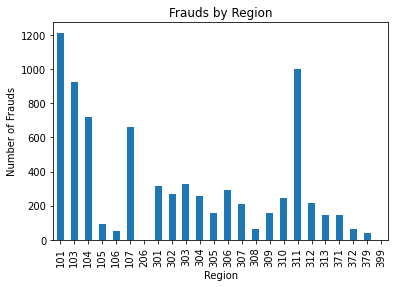

In [14]:
fraud_data = client_df[client_df['target'] == 1]
grouped_data = fraud_data.groupby('region').count()
grouped_data['target'].plot.bar()

plt.xlabel('Region')
plt.ylabel('Number of Frauds')
plt.title('Frauds by Region')

plt.show()

In [15]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [16]:
invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'])

In [17]:
invoice_df['counter_statue'].value_counts()

0         4346960
1           73496
0           32048
5           20495
4            2706
1             540
3             258
5             144
2              32
4              23
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

In [18]:
invoice_df['counter_statue'] = invoice_df['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,46:-1,'A':-1,618:-1,769:-1,269375:-1,420:-1})

In [19]:
invoice_df['counter_statue'].value_counts()

 0    4379008
 1      74036
 5      20639
 4       2729
 3        258
-1         47
 2         32
Name: counter_statue, dtype: int64

In [20]:
invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'])

- it would be best to replace ELEC with 0 and GAZ with 1 so i can have numerical data

In [21]:
invoice_df['counter_type'] = invoice_df['counter_type'].map({"ELEC":0, "GAZ":1})

In [22]:
invoice_df['counter_type'].value_counts()

0    3079406
1    1397343
Name: counter_type, dtype: int64

In [23]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            int64         
 3   counter_number        int64         
 4   counter_statue        int64         
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   int64         
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int64         
 15  counter_type          int64         
dtypes: datetime64[ns](1), int64(14), object(1)
memory usage: 546.5+ MB


In [24]:
df = pd.merge(client_df, invoice_df, on='client_id')

In [25]:
df.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,1994-12-31,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,0
1,60,train_Client_0,11,101,1994-12-31,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,0
2,60,train_Client_0,11,101,1994-12-31,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,0
3,60,train_Client_0,11,101,1994-12-31,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,0
4,60,train_Client_0,11,101,1994-12-31,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,0


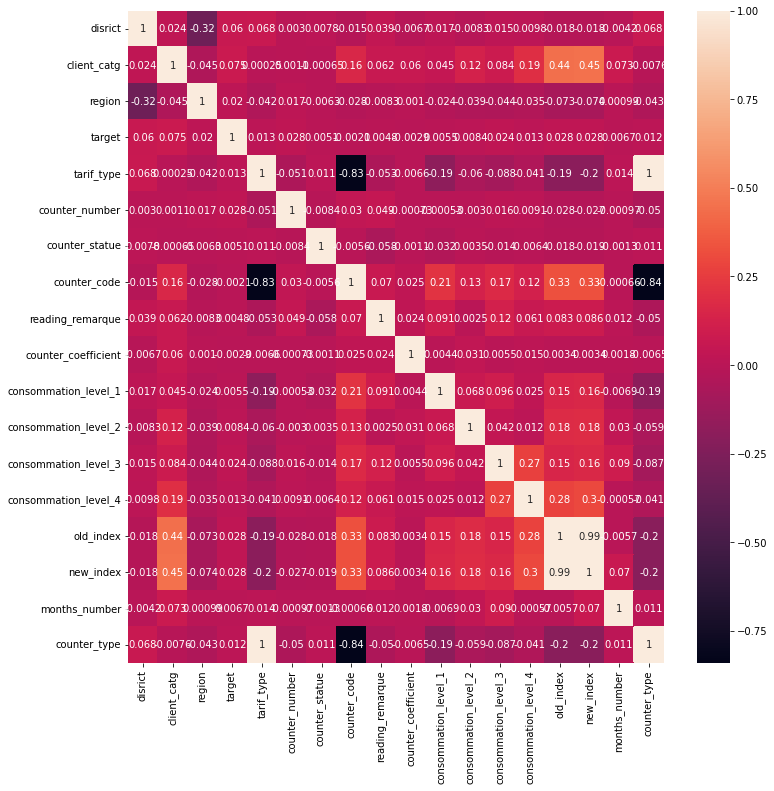

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [27]:
from sklearn.model_selection import train_test_split

x=list(df.columns)
x.remove('client_id')
x.remove('invoice_date')
x.remove('creation_date')
x.remove('target')
# after plotting feature importance, realised that i should remove some other features
x.remove('counter_statue')
x.remove('counter_coefficient')
x.remove('counter_type')
x.remove('reading_remarque')
x = df[x]
y=df['target']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=6)
model = model.fit(xTrain, yTrain)

In [29]:
predictions = model.predict(xTest)

In [30]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(yTest,predictions),8)*100)

92.107101


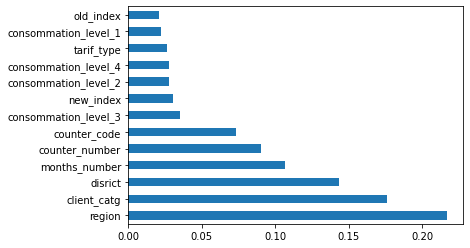

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=xTrain.columns)
feat_importances.nlargest(20).plot(kind='barh')